# 📊 Análisis descriptivo del Conjunto de Datos
Antes de llevar a cabo el desarrollo de los modelos de clasificación mediante redes neuronales, es necesario efectuar un **análisis exploratorio de los datos y su correcta depuración**. En esta etapa adecuaremos el conjunto de datos para la fase de modelización posterior, asegurándonos de que no haya observaciones incoherentes ni valores atípicos o perdidos que puedan afectar la calidad de los modelos.

In [1]:
# =============================================================================
# LIBRERIAS
# =============================================================================

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import os

In [2]:
# Cargamos las funciones que vamos a utilizar
from utils.FuncionesMineria import *

## 🔹 1. Importación del conjunto de datos
El primer paso consiste en cargar el conjunto de datos en nuestro entorno de trabajo. Estos datos están almacenados en un archivo CSV llamado `btc_historical_data.csv`, cuya creación y obtención se explican en el notebook `01_feature_engineering.ipynb`. Para ello, se utiliza el siguiente fragmento de código:

In [3]:
# Importamos CSV

df_bitcoin = pd.read_csv('../01_data_preparation/data/btc_historical_data.csv')                         
df_bitcoin

,Open time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,...,transaction_rate,market_cap_usd,average_block_size,market_price_usd,exchange_volume_usd,average_confirmation_time,hash_rate,difficulty,miners_revenue,total_transaction_fees
0,2017-10-05,4208.59,4355.00,4110.00,4292.43,779.138638,3.295533e+06,9158.0,351.042019,1.483037e+06,...,2.791667,7.120069e+10,1.018034,4211.55,2.127088e+08,111.082550,6.983443e+06,1.123863e+12,7.562751e+06,160.344240
1,2017-10-06,4318.99,4417.00,4292.00,4369.00,506.529176,2.212035e+06,6546.0,226.148177,9.881066e+05,...,2.866667,7.255732e+10,0.920436,4318.58,2.057251e+08,31.514477,8.882940e+06,1.123863e+12,9.444311e+06,149.021202
2,2017-10-07,4369.00,4479.50,4312.56,4423.00,297.597500,1.302533e+06,4804.0,145.313076,6.371469e+05,...,2.550000,7.216553e+10,0.836508,4369.57,1.915422e+08,20.892141,8.827072e+06,1.123863e+12,9.178387e+06,108.215564
3,2017-10-08,4425.00,4658.00,4425.00,4640.00,518.462004,2.347356e+06,7580.0,280.094854,1.268661e+06,...,2.666667,7.419533e+10,0.764420,4439.46,1.281929e+08,20.239779,1.016789e+07,1.123863e+12,1.098203e+07,111.796475
4,2017-10-09,4640.00,4889.98,4550.00,4786.95,646.463145,3.040509e+06,10372.0,350.756559,1.654275e+06,...,3.283333,7.648983e+10,0.921536,4605.66,2.516054e+08,23.698470,8.994675e+06,1.123863e+12,1.016728e+07,149.340987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872,2025-08-16,117342.04,117898.99,117143.98,117380.66,6393.681170,7.517194e+08,1179842.0,2995.228650,3.521588e+08,...,2.975000,2.344190e+12,1.665970,117419.50,3.855598e+08,8.231568,9.780076e+08,1.294352e+14,5.629125e+07,2.989912
2873,2025-08-17,117380.66,118575.00,117172.21,117405.01,5898.641920,6.956292e+08,1177563.0,2804.731130,3.307994e+08,...,2.658333,2.352079e+12,1.523959,117484.12,1.547407e+08,5.932923,9.780076e+08,1.294352e+14,5.711806e+07,2.540358
2874,2025-08-18,117405.01,117543.75,114640.14,116227.05,17741.469250,2.053300e+09,3345487.0,7647.218200,8.850528e+08,...,3.316667,2.305944e+12,1.562829,117455.50,1.693708e+08,10.626850,9.908761e+08,1.294352e+14,5.770019e+07,3.392547
2875,2025-08-19,116227.05,116725.69,112732.58,112872.94,18065.420860,2.065005e+09,3291170.0,8609.360780,9.840874e+08,...,3.283333,2.294257e+12,1.739986,116251.12,4.406906e+08,12.908552,8.621909e+08,1.294352e+14,4.993566e+07,3.270740


## 🔹 2. Asignación correcta de los tipos de variables
Una vez que tenemos disponible el conjunto de datos, el siguiente paso consiste en evaluar el tipo de variable que ha sido asignado a cada columna. Esta verificación es esencial para asegurarnos de que los datos se interpreten correctamente. Por ejemplo, es importante que las fechas estén en formato `datetime`, los valores numéricos como `float` o `int`, y las variables categóricas como `object` o `category`.

In [4]:
# Comprobamos el tipo de formato de las variables
for col, dtype in df_bitcoin.dtypes.items():
    print(f"{col}: {dtype}")

Open time: object
Open: float64
High: float64
Low: float64
Close: float64
Volume: float64
Quote asset volume: float64
Number of trades: float64
Taker buy base asset volume: float64
Taker buy quote asset volume: float64
Target: int64
SMA_20: float64
Close_SMA_ratio_20: float64
SMA_50: float64
Close_SMA_ratio_50: float64
EMA_20: float64
Close_EMA_ratio_20: float64
EMA_50: float64
Close_EMA_ratio_50: float64
MACD: float64
MACD_signal: float64
MACD_diff: float64
PSAR: float64
KAMA_10: float64
Close_KAMA_ratio: float64
RSI_7: float64
RSI_14: float64
WR_7: float64
WR_14: float64
STOCH_K_7: float64
STOCH_D_7: float64
STOCH_K_14: float64
STOCH_D_14: float64
ROC_5: float64
ROC_10: float64
ROC_14: float64
MOM_5: float64
MOM_10: float64
dRSI_7: float64
dRSI_14: float64
dROC_5: float64
dROC_10: float64
dROC_14: float64
dMOM_5: float64
dMOM_10: float64
BB_high_10: float64
BB_low_10: float64
BB_mid_10: float64
BB_width_10: float64
BB_percent_10: float64
BB_high_20: float64
BB_low_20: float64
BB_mid_

> 👉 Todas las variables del conjunto de datos presentan un tipo de dato correctamente asignado, con excepción de dos casos: la variable **`Open time`**, que ha sido interpretada como tipo `object` cuando debería ser `datetime`, y la variable objetivo **`Target`**, que ha sido asignada como tipo `int64` cuando, por su naturaleza categórica, debería ser `object`.

En consecuencia, procedemos a realizar las conversiones correspondientes:

In [5]:
# Asignamos el tipo correcto a la variable Open time

df_bitcoin['Open time'] = pd.to_datetime(df_bitcoin['Open time'], format='%Y-%m-%d')
df_bitcoin['Target'] = df_bitcoin['Target'].astype(str)

for col in ['Open time', 'Target']:
    print(f"{col}: {df_bitcoin.dtypes[col]}")

Open time: datetime64[ns]
Target: object


Por otro lado, es relevante considerar que, si alguna variable cuantitativa dispone de un número de valores distintos inferior a 10, se recomienda tratarla como una variable cualitativa. Con este fin, nos apoyaremos en la función **`cuentaDistintos()`**, que verifica cuántos valores distintos posee cada una de las variables cuantitativas:

In [6]:
# Cuenta el número de valores distintos de cada una de las variables numéricas de un DataFrame
df_distintos = cuentaDistintos(df_bitcoin)

# Luego filtramos las columnas con 10 o menos valores distintos
filtrado = df_distintos[df_distintos['Distintos'] <= 10]

filtrado

,Columna,Distintos


> 👉 Si analizamos el resultado, observamos que todas las variables cuantitativas que componen nuestro dataset cuentan con más de diez valores diferentes. En consecuencia, no será necesario realizar la conversión en ningún caso. 

## 🔹 3. Análisis Exploratorio

### 📈 Análisis de la variables catégoricas
Comenzamos con el análisis descriptivo básico de las variables categóricas que participan en el conjunto de datos con la función **`analizar_variables_categoricas()`**. Esta mide la frecuencia correspondiente de cada una de las categorías, lo que nos capacita para revisar que todas ellas estén correcta y suficientemente representadas:

In [7]:
# Frecuencias de los valores en las variables categóricas
analizar_variables_categoricas(df_bitcoin)

{'Target':       n        %
 1  1482  0.51512
 0  1395  0.48488}

> 👉 La variable objetivo `Target` presenta dos categorías claramente definidas: `1` y `0`, con una distribución relativamente equilibrada (51.5% y 48.5%, respectivamente). Esto indica que las categorías están correctamente asignadas y bien representadas.

### 📈 Análisis de la variables numéricas
Del mismo modo, se presenta un análisis descriptivo de las numéricas que participan en el *dataset*. Con el objetivo de facilitar el estudio, se ha dividido el conjunto de datos en varios subconjuntos diferenciados:

-  **Variables de mercado**: Este grupo incluye las variables relacionadas con el comportamiento del mercado financiero, todas de tipo `float64`:
   - `Open`
   - `High`
   - `Low`
   - `Close`
   - `Volume`
   - `Quote asset volume`
   - `Number of trades`
   - `Taker buy base asset volume`
   - `Taker buy quote asset volume`
- **Indicadores técnicos**: Cada grupo de indicadores técnicos tendrá su subconjunto correspondiente (*tendencia*, *momentum*, *volatilidad* y *volumen*)
- **Variables de la blockchain**: Incluye aquellas variables que provienen directamente de la actividad en la red blockchain.
Esta segmentación permite realizar un análisis más enfocado y eficiente, adaptando las técnicas estadísticas y de modelado a la naturaleza de cada grupo de variables.



In [8]:
# =============================================================================
# Función para calcular descriptivos
# =============================================================================

def calcular_descriptivos(df):
    """
    Calcula estadísticas descriptivas para cada columna numérica de un DataFrame.

    Args:
        df (DataFrame): El DataFrame que contiene los datos numéricos.

    Returns:
        DataFrame: Un DataFrame transpuesto con estadísticas como media, desviación estándar,
                   asimetría, curtosis y rango para cada variable numérica.
    """
    # Estadísticas básicas
    descriptivos = df.describe().T

    # Añadir asimetría, curtosis y rango
    for col in df.select_dtypes(include=[np.number]).columns:
        descriptivos.loc[col, "Asimetria"] = df[col].skew()
        descriptivos.loc[col, "Kurtosis"] = df[col].kurtosis()
        descriptivos.loc[col, "Rango"] = np.ptp(df[col].dropna().values)

    return descriptivos


In [9]:
# =============================================================================
# Obtenemos conjuntos de datos
# =============================================================================

# DF con variables de mercado
df_mercado = df_bitcoin.loc[:, 'Open':'Taker buy quote asset volume']

# DF con indicadores técnicos de tendencia
df_ta_tendencia = df_bitcoin.loc[:, 'SMA_20':'Close_KAMA_ratio']

# DF con indicadores técnicos de momentum
df_ta_momentum = df_bitcoin.loc[:, 'RSI_7':'dMOM_10']

# DF con indicadores técnicos de volatilidad
df_ta_volatilidad = df_bitcoin.loc[:, 'BB_high_10':'DC_width_20']

# DF con indicadores técnicos de volumen
df_ta_volumen = df_bitcoin.loc[:, 'OBV':'Vol_ratio_50']

# DF con variables de blockchain
df_blockchain = df_bitcoin.loc[:, 'mempool_size':'total_transaction_fees']

#### ➡️ Variables de mercado

In [10]:
calcular_descriptivos(df_mercado)

,count,mean,std,min,25%,50%,75%,max,Asimetria,Kurtosis,Rango
Open,2877.0,3.329525e+04,2.915153e+04,3.211710e+03,9.162210e+03,2.394020e+04,4.888759e+04,1.233064e+05,1.129221,0.449850,1.200947e+05
High,2877.0,3.403855e+04,2.966622e+04,3.276500e+03,9.343820e+03,2.459959e+04,5.012500e+04,1.244740e+05,1.112252,0.395009,1.211975e+05
Low,2877.0,3.250629e+04,2.862927e+04,3.156260e+03,8.913000e+03,2.350225e+04,4.708800e+04,1.189209e+05,1.150004,0.517365,1.157647e+05
Close,2877.0,3.333351e+04,2.918559e+04,3.211720e+03,9.170000e+03,2.395405e+04,4.889100e+04,1.233064e+05,1.129112,0.448125,1.200947e+05
Volume,2877.0,6.555341e+04,7.819809e+04,2.975975e+02,2.664143e+04,4.185816e+04,6.880669e+04,7.607054e+05,3.504560,16.194875,7.604078e+05
Quote asset volume,2877.0,1.786236e+09,1.965746e+09,1.302533e+06,3.811033e+08,1.161659e+09,2.487562e+09,1.746531e+10,2.324403,8.311877,1.746400e+10
Number of trades,2877.0,1.798643e+06,2.130512e+06,4.804000e+03,4.109020e+05,1.075177e+06,2.151711e+06,1.522359e+07,2.310291,6.271161,1.521878e+07
Taker buy base asset volume,2877.0,3.257242e+04,3.892113e+04,1.453131e+02,1.336595e+04,2.089643e+04,3.427692e+04,3.747756e+05,3.531787,16.399940,3.746303e+05
Taker buy quote asset volume,2877.0,8.832056e+08,9.772859e+08,6.371469e+05,1.900037e+08,5.669079e+08,1.237800e+09,8.783916e+09,2.363032,8.619077,8.783279e+09


##### 🔎 Interpretación

- **Precios (`Open`, `High`, `Low`, `Close`)**:
    - El precio promedio de apertura, cierre, máximo y mínimo se ubica alrededor de 33,000 USD, con una desviación
    estándar cercana a 29,000 USD, lo que **refleja alta volatilidad**.
    - Los valores extremos muestran un rango entre 3,200 USD y 123,000 USD, con asimetría positiva (≈1.1–1.15), lo
      que indica que existen más valores extremos hacia la derecha (precios altos, picos de precio).
    - La curtosis baja (≈0.4–0.5) sugiere que las distribuciones de precios no presentan colas extremadamente
    - pesadas, pero sí se dan episodios de volatilidad marcada.

> **Nota**: Aunque los máximos en torno a 123,000–124,000 USD puedan parecer un error, se ha verificado en Binance que son correctos. Corresponden a los precios alcanzados los días 13 y 14 de agosto de 2025, tal como se muestra en las imágenes:

![Gráfico BTC](images/binance.png)
![Gráfico BTC2](images/binance2.png)

- **Volumen negociado (`Volume`)**:
    - Volumen medio: 65,553 BTC diarios, con un rango muy amplio hasta 760,000 BTC.
    - Alta asimetría positiva (3.5) y curtosis elevada (16.2), lo que evidencia la presencia de eventos extremos en liquidez.
- **Volumen en dólares (`Quote Asset Volume`)**:
    - Promedio: 1.78 mil millones USD diarios, con picos hasta 17.4 mil millones USD.
    - Distribución con asimetría positiva (2.32) y colas largas (curtosis 8.3) → existen días de actividad extraordinaria.
- **Número de transacciones (`Trades`)**:
    - Promedio: 1.8 millones de operaciones por día, con un máximo superior a 15 millones.
    - La dispersión es alta (std = 2.1 millones), con asimetría positiva (2.3) y curtosis elevada (6.27) → evidencia que el mercado tiene días con incrementos explosivos en actividad.
- **Taker Buy Volume (Volumen de compra)**:
    - En BTC (`Taker buy base asset`): promedio de 32,572 BTC diarios, con un rango máximo de 374,000 BTC.
    - En USD (`Taker buy quote asset volume`): promedio de 883 millones USD diarios, con máximos cercanos a 8.7 mil millones USD.
    - Al igual que el volumen total, muestran asimetría alta (>3) y colas largas (>8 de curtosis), lo que confirma que la presión compradora es muy variable y depende de eventos de mercado.

##### 📌 Conclusiones clave

- Bitcoin presenta alta volatilidad estructural tanto en precios como en volúmenes.
- La asimetría positiva en todas las métricas indica que los episodios extremos son más frecuentes hacia el lado alcista (subidas de precio, picos de volumen).
- Los volúmenes y número de trades tienen colas pesadas, reflejando la importancia de días puntuales (crisis, anuncios macroeconómicos...) en la dinámica del mercado.
- Estos resultados sugieren que se debe considerar no solo la media y desviación estándar, sino también eventos extremos que dominan el comportamiento del activo.

#### ➡️ Indicadores técnicos tendencia

In [11]:
calcular_descriptivos(df_ta_tendencia)

,count,mean,std,min,25%,50%,75%,max,Asimetria,Kurtosis,Rango
SMA_20,2877.0,32960.720747,28750.488054,3500.048500,9169.046500,23406.857500,48369.591000,118285.325500,1.119416,0.427407,114785.277000
Close_SMA_ratio_20,2877.0,1.013166,0.094159,0.558114,0.963220,1.007506,1.062101,1.662698,0.398184,2.801291,1.104583
SMA_50,2877.0,32372.667366,28033.357371,3619.334600,8928.343400,23439.258000,47334.490600,115995.495400,1.096579,0.363146,112376.160800
Close_SMA_ratio_50,2877.0,1.035241,0.165368,0.523741,0.939448,1.014424,1.130186,2.101538,0.819759,3.052582,1.577797
EMA_20,2877.0,32961.786255,28706.461067,3500.410645,9102.315058,23427.538330,48155.505951,117530.557655,1.116111,0.417392,114030.147010
Close_EMA_ratio_20,2877.0,1.010694,0.080732,0.574306,0.967827,1.006692,1.052948,1.574461,0.245108,2.967469,1.000155
EMA_50,2877.0,32389.947371,27941.780857,3678.001925,8936.834608,23555.486903,47069.073819,115049.562152,1.092847,0.357824,111371.560227
Close_EMA_ratio_50,2877.0,1.027886,0.141333,0.548204,0.943721,1.015095,1.105389,1.961296,0.760556,2.876248,1.413092
MACD,2877.0,273.733667,1417.098968,-5073.278718,-360.853466,58.237124,761.255203,7019.055192,0.769461,3.080244,12092.333910
MACD_signal,2877.0,272.934275,1348.793817,-4435.851793,-330.054777,54.582590,758.663445,6402.010447,0.763575,2.832589,10837.862240


##### 🔎 Interpretación

Poner aqui analisis ta tendencia

#### ➡️ Indicadores técnicos *momentum*

In [12]:
calcular_descriptivos(df_ta_momentum)

,count,mean,std,min,25%,50%,75%,max,Asimetria,Kurtosis,Rango
RSI_7,2877.0,52.882299,18.102692,4.439907,39.536221,51.926155,65.768979,98.006880,0.100681,-0.512852,93.566973
RSI_14,2877.0,52.815384,13.800325,10.497797,43.403208,51.623454,62.029643,93.460719,0.220706,-0.189965,82.962922
WR_7,2877.0,-45.490302,28.123555,-99.720880,-70.677592,-43.631453,-20.012120,-0.122164,-0.139242,-1.275807,99.598716
WR_14,2877.0,-45.167787,28.476128,-99.751156,-70.591843,-43.746770,-18.489164,-0.088272,-0.129150,-1.275138,99.662884
STOCH_K_7,2877.0,54.509698,28.123555,0.279120,29.322408,56.368547,79.987880,99.877836,-0.139242,-1.275807,99.598716
STOCH_D_7,2877.0,54.523042,24.728068,4.317959,33.339017,55.383606,77.444141,98.242361,-0.123262,-1.223969,93.924402
STOCH_K_14,2877.0,54.832213,28.476128,0.248844,29.408157,56.253230,81.510836,99.911728,-0.129150,-1.275138,99.662884
STOCH_D_14,2877.0,54.852702,26.650127,2.541840,30.736525,56.218308,79.768334,98.155984,-0.126890,-1.320529,95.614144
ROC_5,2877.0,0.900404,8.095187,-45.986456,-3.187474,0.505118,4.895205,52.424102,0.129256,2.580233,98.410559
ROC_10,2877.0,1.855557,11.910966,-46.159610,-4.607740,0.959207,7.459075,72.010363,0.509949,2.358158,118.169973


##### 🔎 Interpretación

Poner aqui analisis ta momentum

#### ➡️ Indicadores técnicos volatilidad

In [13]:
calcular_descriptivos(df_ta_volatilidad)

,count,mean,std,min,25%,50%,75%,max,Asimetria,Kurtosis,Rango
BB_high_10,2877.0,35380.966466,30447.197171,3506.587946,9757.119654,25549.424213,52601.540158,123678.848949,1.067005,0.252371,120172.261002
BB_low_10,2877.0,30936.048810,27602.898217,2962.598491,8275.661297,22434.789383,44826.742643,116769.698122,1.194176,0.671009,113807.099631
BB_mid_10,2877.0,33158.507638,28982.531494,3358.474000,9167.569000,23743.971000,48655.081000,118504.732000,1.124953,0.440026,115146.258000
BB_width_10,2877.0,4444.917656,4237.343958,103.403025,1220.419676,2885.243415,6796.842993,29790.407368,1.502215,2.572317,29687.004343
BB_percent_10,2877.0,0.532340,0.315796,-0.225344,0.274177,0.540691,0.793387,1.230550,-0.082114,-0.946733,1.455894
BB_high_20,2877.0,36177.998102,30820.018393,3637.401000,10095.176281,26320.362892,55388.067875,124134.265631,1.035279,0.160732,120496.864630
BB_low_20,2877.0,29743.443392,26842.907608,2928.349272,7804.987485,21120.074042,43072.527800,116672.986260,1.223666,0.768575,113744.636988
BB_mid_20,2877.0,32960.720747,28750.488054,3500.048500,9169.046500,23406.857500,48369.591000,118285.325500,1.119416,0.427407,114785.277000
BB_width_20,2877.0,6434.554710,5870.961753,217.462423,1882.203185,4272.804285,9704.810269,38159.504642,1.518769,3.023480,37942.042219
BB_percent_20,2877.0,0.542392,0.337396,-0.514776,0.282993,0.551004,0.815407,1.527677,-0.105932,-0.680659,2.042453


##### 🔎 Interpretación

Poner aqui analisis ta volatilidad

#### ➡️ Indicadores técnicos volumen

In [14]:
calcular_descriptivos(df_ta_volumen)

,count,mean,std,min,25%,50%,75%,max,Asimetria,Kurtosis,Rango
OBV,2877.0,5.859880e+05,1.823265e+06,-4.242190e+06,-6.118149e+05,-7.003110e+04,1.828557e+06,4.760994e+06,0.706962,-0.648308,9.003184e+06
CMF_20,2877.0,7.571064e-02,1.284597e-01,-3.142845e-01,-1.629800e-02,7.150770e-02,1.622061e-01,4.500244e-01,0.074843,-0.304946,7.643088e-01
MFI_14,2877.0,5.195953e+01,1.740330e+01,3.465104e+00,3.970992e+01,5.147964e+01,6.337444e+01,1.000000e+02,0.105796,-0.341611,9.653490e+01
ADL,2877.0,6.546086e+06,4.546016e+06,3.195411e+03,1.541108e+06,8.064424e+06,1.074395e+07,1.279094e+07,-0.202352,-1.544273,1.278774e+07
OBV_diff,2877.0,-1.751814e+02,1.020473e+05,-7.607054e+05,-4.098924e+04,5.898642e+03,4.250545e+04,6.993609e+05,-0.035131,9.301517,1.460066e+06
OBV_roc_5,2877.0,-3.612316e-02,8.223816e+00,-3.376824e+02,-6.897725e-02,-2.407916e-03,6.735448e-02,2.318350e+02,-16.328198,1217.077391,5.695173e+02
OBV_ma20,2877.0,5.876031e+05,1.813595e+06,-2.596717e+06,-6.019153e+05,-7.764758e+04,1.786566e+06,4.639306e+06,0.727048,-0.673984,7.236022e+06
OBV_ma_cross,2877.0,-1.615085e+03,2.441683e+05,-2.227947e+06,-6.568678e+04,2.392418e+03,7.764864e+04,1.881258e+06,-0.506261,15.422339,4.109204e+06
CMF_diff,2877.0,-6.227456e-05,4.344443e-02,-1.630574e-01,-2.867593e-02,2.148470e-04,2.761641e-02,1.826868e-01,0.006286,0.270189,3.457443e-01
CMF_zscore,2877.0,-5.404546e-03,1.246786e+00,-3.618682e+00,-1.002224e+00,-9.590469e-03,9.869746e-01,3.504066e+00,0.015537,-0.809542,7.122749e+00


##### 🔎 Interpretación

Poner aqui analisis ta volumen

#### ➡️ Variables de *blockchain*

In [15]:
calcular_descriptivos(df_blockchain)

,count,mean,std,min,25%,50%,75%,max,Asimetria,Kurtosis,Rango
mempool_size,2877.0,4.103067e+07,5.933980e+07,2.871695e+05,1.637650e+06,7.640796e+06,6.841872e+07,3.810704e+08,2.113291,5.529574,3.807832e+08
transaction_rate,2877.0,3.472132e+00,8.284501e-01,1.450000e+00,3.008333e+00,3.416667e+00,3.866667e+00,8.800000e+00,1.166307,4.129961,7.350000e+00
market_cap_usd,2877.0,6.421541e+11,5.814722e+11,5.520196e+10,1.645700e+11,4.588720e+11,9.207293e+11,2.406473e+12,1.172646,0.567545,2.351271e+12
average_block_size,2877.0,1.293924e+00,3.250181e-01,4.314518e-01,1.053092e+00,1.264695e+00,1.583604e+00,2.524785e+00,0.252795,-0.266090,2.093334e+00
market_price_usd,2877.0,3.330470e+04,2.915329e+04,3.231910e+03,9.164620e+03,2.395377e+04,4.889765e+04,1.233594e+05,1.129149,0.450103,1.201275e+05
exchange_volume_usd,2877.0,3.575948e+08,3.728743e+08,1.722276e+07,1.322972e+08,2.428741e+08,4.318853e+08,4.956850e+09,3.296360,18.999473,4.939627e+09
average_confirmation_time,2877.0,1.814436e+02,8.524585e+02,3.503122e+00,1.876061e+01,4.076106e+01,9.810156e+01,2.580973e+04,17.045955,404.160694,2.580623e+04
hash_rate,2877.0,2.729253e+08,2.611029e+08,5.426063e+06,8.403318e+07,1.599542e+08,4.064645e+08,1.084829e+09,1.145534,0.144572,1.079403e+09
difficulty,2877.0,3.762655e+13,3.580169e+13,1.123863e+12,1.189059e+13,2.172413e+13,5.415014e+13,1.294352e+14,1.116996,0.020110,1.283114e+14
miners_revenue,2877.0,2.800967e+07,1.578356e+07,4.666604e+06,1.518600e+07,2.440491e+07,3.994676e+07,1.077559e+08,0.712198,-0.230897,1.030893e+08


##### 🔎 Interpretación

Poner analisis variables blockchain

## 🔹 4. Análisis de valores atípicos *(outliers)*
Se denominan datos atípicos (*outliers*) a aquellas observaciones cuyos valores distan mucho del resto de valores de la variable. Estos pueden ser originados por un error en la entrada de datos, un error en la codificación o pueden ocurrir como consecuencia de un acontecimiento esporádico. Los datos atípicos representan un problema y tienen una gran influencia en los resultados si los modelos no son robustos, debido a ello, es necesario analizarlos y tratarlos. 

### 📈 Análisis cuantitativo de *outliers*
A continuación, **calculamos la proporción de valores atípicos** para cada una de las variables numéricas. En este caso, también se realizará el estudio sobre los subconjuntos creados previamente para facilitar el análisis:

> 👉 **Nota**: Es importante destacar que, por definición, el número de datos atípicos ha de ser pequeño pues, de lo contrario, no podrán ser considerados como atípicos. En esta instancia, establecemos como criterio que **la proporción de valores atípicos no exceda el 10%** para ser clasificados de dicha manera.

#### ➡️ Variables de mercado

In [16]:
{x: atipicosAmissing(df_mercado[x])[1] / len(df_mercado) for x in df_mercado.columns}

{'Open': 0.0,
 'High': 0.0,
 'Low': 0.0,
 'Close': 0.0,
 'Volume': 0.03962460896767466,
 'Quote asset volume': 0.004171011470281543,
 'Number of trades': 0.010427528675703858,
 'Taker buy base asset volume': 0.03962460896767466,
 'Taker buy quote asset volume': 0.0045185957594716716}

##### 🔎 Interpretación
- `Open`, `High`, `Low`, `Close` = 0.0 → No disponemos de valores atípicos en los precios.
- `Volumen` (≈ 3.96%) y `Taker buy base asset volume` (≈ 3.96%) → Un ~4% de los días tiene volúmenes que destacan como atípicos. Esto es bastante esperable en BTC, dado que hay eventos con picos enormes de actividad.
- `Quote asset volume` (≈ 0.42%) y `Taker buy quote asset volume` (≈ 0.45%) → Proporción muy baja, menos del 1%.
- `Number of trades` (≈ 1.04%) → Coherente con jornadas de altísima volatilidad con picos de operaciones.

> 👉 Como ninguna variable excede el límite establecido, se conservarán los valores originales.

#### ➡️ Indicadores técnicos tendencia

In [17]:
{x: atipicosAmissing(df_ta_tendencia[x])[1] / len(df_ta_tendencia) for x in df_ta_tendencia.columns}

{'SMA_20': 0.0,
 'Close_SMA_ratio_20': 0.005213764337851929,
 'SMA_50': 0.0,
 'Close_SMA_ratio_50': 0.005213764337851929,
 'EMA_20': 0.0,
 'Close_EMA_ratio_20': 0.004866180048661801,
 'EMA_50': 0.0,
 'Close_EMA_ratio_50': 0.005213764337851929,
 'MACD': 0.018421967327076814,
 'MACD_signal': 0.017726798748696558,
 'MACD_diff': 0.014946124435175531,
 'PSAR': 0.0,
 'KAMA_10': 0.0,
 'Close_KAMA_ratio': 0.0010427528675703858}

##### 🔎 Interpretación
- `SMA_20`, `SMA_50`, `EMA_20`, `EMA_50`, `PSAR`, `KAMA_10` → 0% de *outliers*.
- **Ratios Close Media**: La proporción de valores atípicos es muy bajo, en torno al 1%. Esto parece indicar que el precio solo se devía "mucho" de la media en algunos días (días con movimientos extremos de precio).
  - `Close_SMA_ratio_20`: ~0.52%
  - `Close_SMA_ratio_50`: ~0.52%
  - `Close_EMA_ratio_20`: ~0.49%
  - `Close_EMA_ratio_50`: ~0.52%
  - `Close_KAMA_ratio`: ~0.10%
- **`MACD`**: Este es el indicador con mayor presencia de *outliers*. Esto tiene sentido debido a que se trata de un indicador hibrído, ya que no solo mide la dirección de la tendencia, sino también la fuerza de ese movimiento (*momentum*). En el ámbito de las criptomonedas, el *momentum* en ocasiones suele ser explosivo.
    - `MACD`: ~1.84%
    - `MACD_signal`: ~1.77%
    - `MACD_diff`: ~1.49%

> 👉 Como ninguna variable excede el límite establecido, se conservarán los valores originales. Además, eliminar estos datos podría implicar la pérdida de señales valiosas que reflejan cambios extremos en la tendencia, los cuales son especialmente relevantes para el análisis.

#### ➡️ Indicadores técnicos momentum

In [18]:
{x: atipicosAmissing(df_ta_momentum[x])[1] / len(df_ta_momentum) for x in df_ta_momentum.columns}

{'RSI_7': 0.0,
 'RSI_14': 0.0,
 'WR_7': 0.0,
 'WR_14': 0.0,
 'STOCH_K_7': 0.0,
 'STOCH_D_7': 0.0,
 'STOCH_K_14': 0.0,
 'STOCH_D_14': 0.0,
 'ROC_5': 0.0045185957594716716,
 'ROC_10': 0.005561348627042058,
 'ROC_14': 0.006604101494612443,
 'MOM_5': 0.020507473062217587,
 'MOM_10': 0.017726798748696558,
 'dRSI_7': 0.0031282586027111575,
 'dRSI_14': 0.0072992700729927005,
 'dROC_5': 0.0045185957594716716,
 'dROC_10': 0.005908932916232186,
 'dROC_14': 0.009732360097323601,
 'dMOM_5': 0.021202641640597843,
 'dMOM_10': 0.025721237400069517}

##### 🔎 Interpretación
- `RSI` (7 y 14), `Williams %R` (7 y 14), `Stochastic K/D` (7 y 14) → 0% de *outliers*.
- **`ROC` (Rate of Change)**: La proporción de valores atípicos es inferior al 1%. Se observa que, a medida que el periodo analizado se extiende, aumenta el número de outliers. Esto es lógico, ya que un mayor intervalo temporal conlleva una mayor probabilidad de variaciones significativas.
    - `ROC_5`: ~0.45%
    - `ROC_10`: ~0.55%
    - `ROC_14`: ~0.66%
- **Momentum Simple (`MOM`)**: Mayor presencia de valores atípicos ~2%. Esto es comprensible, ya que el indicador refleja la diferencia entre el precio actual y el pasado. Al no estar normalizado, tiende a mostrar valores elevados durante movimientos extremos del activo.
    - `MOM_5`: ~2.05%
    - `MOM_10`: ~1.77%
- **Diferencias de indicadores (`dRSI`, `dROC`, `dMOM`)**: Se observa una mayor presencia de valores atípicos, especialmente en el indicador `dMOM`. Esto se debe a que, al calcular diferencias, se amplifican los movimientos bruscos del activo.
    - `dRSI_7`: ~0.31%
    - `dRSI_14`: ~0.73%
    - `dROC_5`: ~0.45%
    - `dROC_10`: ~0.59%
    - `dROC_14`: ~0.97%
    - `dMOM_5`: ~2.12%
    - `dMOM_10`: ~2.57%
      
> 👉 Como ninguna variable excede el límite establecido, se conservarán los valores originales. El único caso que podría presentar cierta sensibilidad es el de `MOM`/`dMOM`, ya que los valores atípicos reflejan fuertes shocks en el mercado. Sin embargo, no se eliminarán, dado que estos outliers representan precisamente los movimientos más relevantes. No obstante, podría ser conveniente considerar su escalado o aplicar alguna transformación para mejorar su interpretación en la fase de modelización.

#### ➡️ Indicadores técnicos volatilidad

In [19]:
{x: atipicosAmissing(df_ta_volatilidad[x])[1] / len(df_ta_volatilidad) for x in df_ta_volatilidad.columns}

{'BB_high_10': 0.0,
 'BB_low_10': 0.0,
 'BB_mid_10': 0.0,
 'BB_width_10': 0.0006951685783802572,
 'BB_percent_10': 0.0,
 'BB_high_20': 0.0,
 'BB_low_20': 0.0,
 'BB_mid_20': 0.0,
 'BB_width_20': 0.0,
 'BB_percent_20': 0.0,
 'ATR_14': 0.0,
 'ATR_20': 0.0,
 'KC_high_10': 0.0,
 'KC_low_10': 0.0,
 'KC_mid_10': 0.0,
 'KC_width_10': 0.0,
 'KC_high_20': 0.0,
 'KC_low_20': 0.0,
 'KC_mid_20': 0.0,
 'KC_width_20': 0.0,
 'DC_high_20': 0.0,
 'DC_low_20': 0.0,
 'DC_mid_20': 0.0,
 'DC_width_20': 0.0}

##### 🔎 Interpretación
Comprobamos que todos los indicadores de volatilidad están libres de *outliers*, con la única excepción de `BB_width_10`, cuya proporción de valores atípicos es mínima (~0.07%) y puede considerarse despreciable.

> 👉 A diferencia de los indicadores técnicos de *momentum*, los indicadores de volatilidad presentan una dinámica mucho más suave, ya que se basan en medias móviles, rangos y el ATR (Average True Range). Asimismo, no exceden el límite establecido y se conservarán los valores originales.

#### ➡️ Indicadores técnicos volumen

In [20]:
{x: atipicosAmissing(df_ta_volumen[x])[1] / len(df_ta_volumen) for x in df_ta_volumen.columns}

{'OBV': 0.0,
 'CMF_20': 0.0,
 'MFI_14': 0.0,
 'ADL': 0.0,
 'OBV_diff': 0.026068821689259645,
 'OBV_roc_5': 0.0667361835245047,
 'OBV_ma20': 0.0,
 'OBV_ma_cross': 0.023635731664928744,
 'CMF_diff': 0.0,
 'CMF_zscore': 0.0,
 'MFI_diff': 0.0003475842891901286,
 'MFI_zscore': 0.0,
 'ADL_diff': 0.02537365311087939,
 'ADL_roc_5': 0.08411539798401112,
 'Vol_SMA20': 0.06360792492179354,
 'Vol_SMA50': 0.0740354535974974,
 'Vol_ratio_20': 0.001737921445950643,
 'Vol_ratio_50': 0.003475842891901286}

##### 🔎 Interpretación
- `OBV`, `OBV_ma20`, `CMF_20`, `CMF_diff`, `CMF_zscore`, `MFI_14`, `MFI_diff`, `MFI_zscore`, `ADL`, `Vol_ratio_20`, `Vol_ratio_50` → 0% de *outliers*.
- **Diferencias respecto a valores previos** (`OBV_diff`, `OBV_ma_cross`, `ADL_diff`): presentan entre un 2% y 3% de valores atípicos. Esto ocurre porque al calcular diferencias se amplifican los movimientos bruscos de volumen.
    - `OBV_diff`: ~2.6%
    - `OBV_ma_cross`: ~2.3%
    - `ADL_diff`: ~2.5%
- Indicadores basados en cambios porcentuales y medias de volumen (`OBV_roc_5`, `ADL_roc_5`, `Vol_SMA20`, `Vol_SMA50`): mayor presencia de *outliers*, entre 6% y 8%. ambos pueden verse distorsionados por picos anormales en el volumen y los ROC, además, son sensibles a denominadores pequeños.
    - `OBV_roc_5`: ~6.6%
    - `ADL_roc_5`: ~8.4%
    - `Vol_SMA20`: ~6.3%
    - `Vol_SMA50`: ~7.4%
      
> 👉 La mayoría de los indicadores de volumen son robustos y no presentan *outliers* (`OBV`, `CMF`, `MFI`, `ADL`). Los que muestran cierta sensibilidad (`OBV_diff`, `ADL_diff`) reflejan cambios puntuales y, aunque generan algo de ruido, representan reacciones naturales a shocks de mercado. Los casos más problemáticos son los indicadores porcentuales (`ROC`) y las medias largas de volumen (`Vol_SMA`), que concentran hasta un 8% de atípicos. No obstante, estos valores extremos son informativos (picos de volumen), por lo que no deberían eliminarse, aunque sí puede ser útil escalar o transformar estas variables para que no dominen en los futuros modelos. Por lo tanto, se conservarán los valores originales para dichas variables.

#### ➡️ Variables *blockchain*

In [21]:
{x: atipicosAmissing(df_blockchain[x])[1] / len(df_blockchain) for x in df_blockchain.columns}

{'mempool_size': 0.011817865832464372,
 'transaction_rate': 0.0003475842891901286,
 'market_cap_usd': 0.0,
 'average_block_size': 0.0,
 'market_price_usd': 0.0,
 'exchange_volume_usd': 0.009384775808133473,
 'average_confirmation_time': 0.07021202641640598,
 'hash_rate': 0.0,
 'difficulty': 0.0,
 'miners_revenue': 0.0,
 'total_transaction_fees': 0.047966631908237745}

##### 🔎 Interpretación
- `market_cap_usd`, `average_block_size`, `market_price_usd`, `hash_rate`, `difficulty`, `miners_revenue` → 0% de *outliers*.
- `transaction_rate`: ~0.03% de outliers. Los picos de actividad en la red podrían explicar la presencia de valores extremos en este caso, aunque la proporción es muy baja e incluso despreciable.
- `exchange_volume_usd`: ~0.94% de outliers. En este contexto, los valores atípicos pueden estar asociados a incrementos repentinos de actividad en los *exchanges*. Esto suele coincidir con *shocks* de mercado (entrada/salida masiva de capital).
- `mempool_size`: ~1.18% de outliers. Refleja acumulaciones atípicas de transacciones no confirmadas. Estos picos suelen corresponder a congestión de red (cuando la demanda de transacciones excede la capacidad de los bloques).
- `total_transaction_fees`: ~4.8% de outliers. Es la segunda variable que más valores atípicos manifiesta. Esto es esperable, ya que las *fees* son muy sensibles a la congestión de la red y pueden dispararse en momentos de alta demanda.

> **Nota**: En *blockchain*, las *fees* (comisiones) son el pago que los usuarios hacen para que sus transacciones sean incluidas en un bloque por los mineros (o validadores).

- `average_confirmation_time`: ~7.0% de outliers. Es la variable con mayor proporción de valores atípicos. El tiempo de confirmación puede dispararse en momentos de saturación de la red o caídas temporales de *hash rate*. Por tanto, aunque los valores extremos reflejan fenómenos reales, aportan bastante variabilidad.

> **Nota**: Una caída temporal de *hash rate* significa que la potencia de cómputo total que los mineros aportan a la red blockchain disminuye de forma repentina durante un periodo corto. Causas comunes: cortes de energía, prohibiciones/regulaciones en un país, caída de la rentabilidad.

> 👉 Como ninguna variable excede el límite establecido, se conservarán los valores originales. La mayoría de métricas *blockchain* son estables y no presentan outliers (`market cap`, `difficulty`, `hash_rate`, etc.). Los indicadores más ruidosos son `total_transaction_fees` (≈5%) y `average_confirmation_time` (≈7%). En ambos casos, los *outliers* reflejan episodios de congestión o ineficiencia en la red. Aunque representan ruido estadístico, conviene no eliminarlos, ya que son señales clave de estrés en la *blockchain*.

## 🔹 5. Análisis de valores perdidos
Al igual que los valores atípicos, la presencia de datos faltantes ha de ser analizada y abordada, ya que pueden reducir el número de observaciones válidas para los procedimientos estadísticos. Asimismo, si la presencia de valores perdidos no es aleatoria, y se deciden eliminar estas observaciones, se puede incurrir en un mayor sesgo en los modelos. Inicialmente, verificamos si existe valores perdidos en las variables de nuestro conjunto de datos:

In [22]:
# =============================================================================
# Comprobamos si nuestro conjunto de datos tiene valores perdidos
# =============================================================================

df_missings = df_bitcoin.isna().sum().reset_index()
df_missings.columns = ['columna', 'n_missing']

print(df_missings)
print('')
print('------------------------------------------')
print('')

# Luego filtramos las columnas que tienen valores faltantes
filtrado = df_missings[df_missings['n_missing'] > 0]

filtrado

                      columna  n_missing
0                   Open time          0
1                        Open          0
2                        High          0
3                         Low          0
4                       Close          0
..                        ...        ...
93  average_confirmation_time          0
94                  hash_rate          0
95                 difficulty          0
96             miners_revenue          0
97     total_transaction_fees          0

[98 rows x 2 columns]

------------------------------------------



,columna,n_missing


> 👉 Verificamos que el dataset no contiene valores faltantes. Por lo tanto, no será necesario aplicar ninguna técnica de imputación o tratamiento de datos ausentes.

## 🔹 6. Relaciones entre variables
Para concluir, es crucial identificar si todas las variables explicativas del conjunto de datos están relacionadas con la variable objetivo y si hay variables de entrada que tengan una alta correlación entre sí. Esto tiene como propósito la selección de las variables más relevantes del conjunto de datos antes de la modelización, conservando aquellas que sean más útiles para la predicción del modelo. Adicionalmente, esto nos ayudará a disminuir la carga computacional necesaria en las siguientes etapas de esta práctica.

### 📈 Relaciones entre variables explicativas y variables objetivo
Con el objetivo de medir la relación entre las variables explicativas de nuestro conjunto de datos y las variables objetivo, emplearemos **el estadístico V de Cramer**. Esta métrica basada en el estadístico χ2, permite identificar la relación entre dos variables y tiene la ventaja de capturar relaciones no lineales entre ellas. Cuanto más cercano a cero sea el valor de la V de Cramer, menor será la relación entre las variables, y cuanto más próximo a uno, mayor será la relación. 

Comenzamos el análisis representando gráficamente la V de Cramer de cada una de las variables:

In [23]:
# Añadir la variable objetivo `Target` a cada subset
df_mercado = df_bitcoin.loc[:, 'Open':'Taker buy quote asset volume'].join(df_bitcoin['Target'])
df_ta_tendencia = df_bitcoin.loc[:, 'SMA_20':'Close_KAMA_ratio'].join(df_bitcoin['Target'])
df_ta_momentum = df_bitcoin.loc[:, 'RSI_7':'dMOM_10'].join(df_bitcoin['Target'])
df_ta_volatilidad = df_bitcoin.loc[:, 'BB_high_10':'DC_width_20'].join(df_bitcoin['Target'])
df_ta_volumen = df_bitcoin.loc[:, 'OBV':'Vol_ratio_50'].join(df_bitcoin['Target'])
df_blockchain = df_bitcoin.loc[:, 'mempool_size':'total_transaction_fees'].join(df_bitcoin['Target'])

#### ➡️ Variables mercado

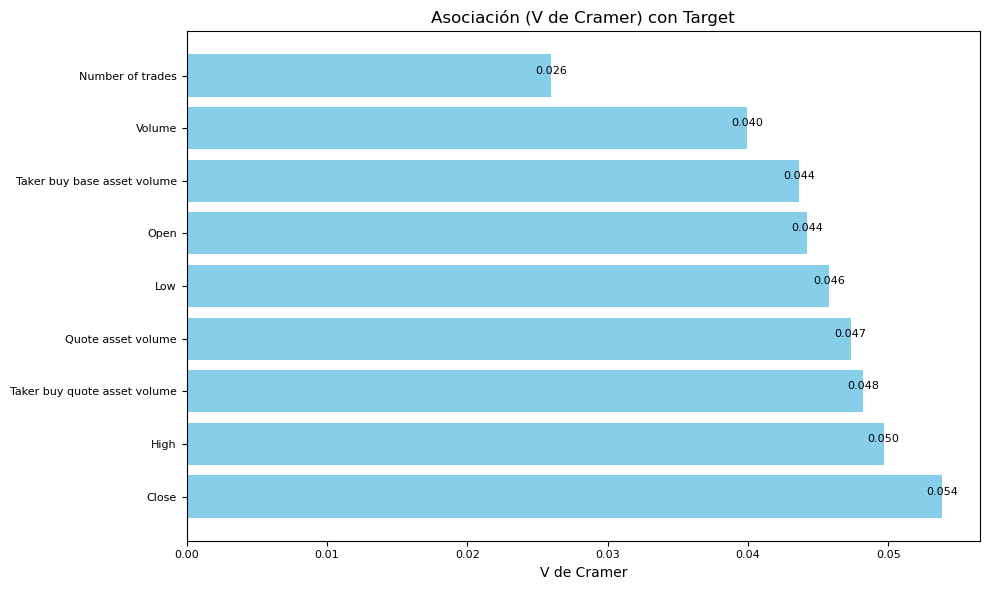

In [24]:
target = df_mercado['Target'] # Variable objetivo
inputs = df_mercado.drop(['Target'], axis = 1) # Variables descriptivas

# --- V de Cramer
graficoVcramer(inputs, target)

#### ➡️ Indicadores técnicos tendencia

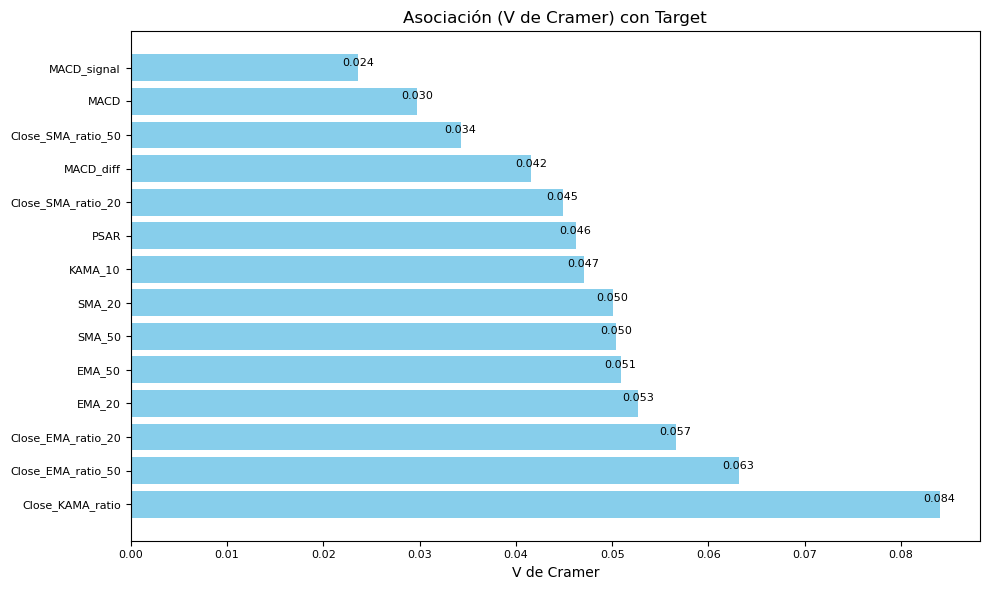

In [25]:
target = df_ta_tendencia['Target'] # Variable objetivo
inputs = df_ta_tendencia.drop(['Target'], axis = 1) # Variables descriptivas

# --- V de Cramer
graficoVcramer(inputs, target)

#### ➡️ Indicadores técnicos *momentum*

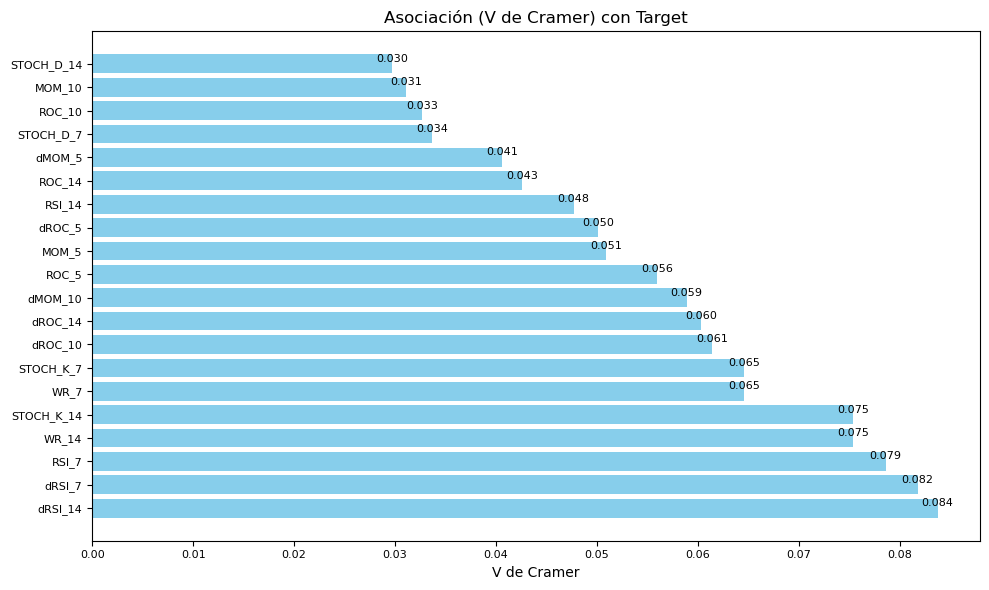

In [26]:
target = df_ta_momentum['Target'] # Variable objetivo
inputs = df_ta_momentum.drop(['Target'], axis = 1) # Variables descriptivas

# --- V de Cramer
graficoVcramer(inputs, target)

#### ➡️ Indicadores técnicos volatilidad

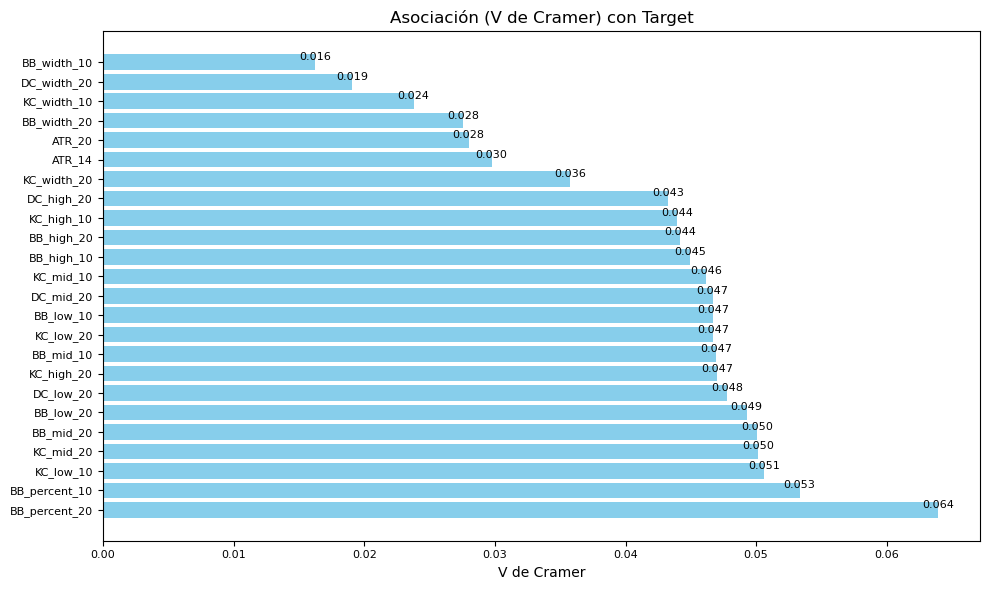

In [27]:
target = df_ta_volatilidad['Target'] # Variable objetivo
inputs = df_ta_volatilidad.drop(['Target'], axis = 1) # Variables descriptivas

# --- V de Cramer
graficoVcramer(inputs, target)

#### ➡️ Indicadores técnicos volumen

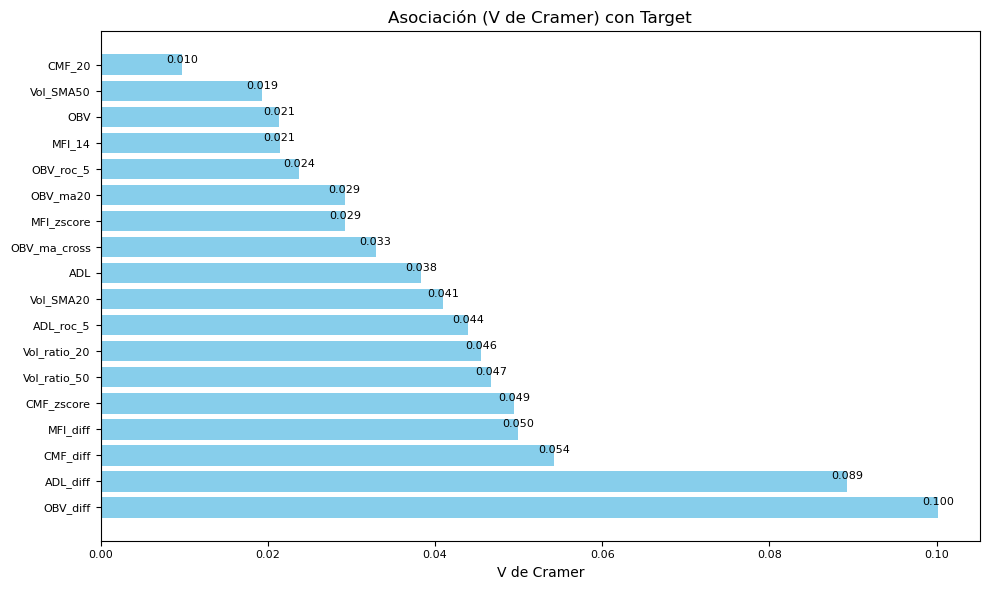

In [28]:
target = df_ta_volumen['Target'] # Variable objetivo
inputs = df_ta_volumen.drop(['Target'], axis = 1) # Variables descriptivas

# --- V de Cramer
graficoVcramer(inputs, target)

#### ➡️ Variables *blockchain*

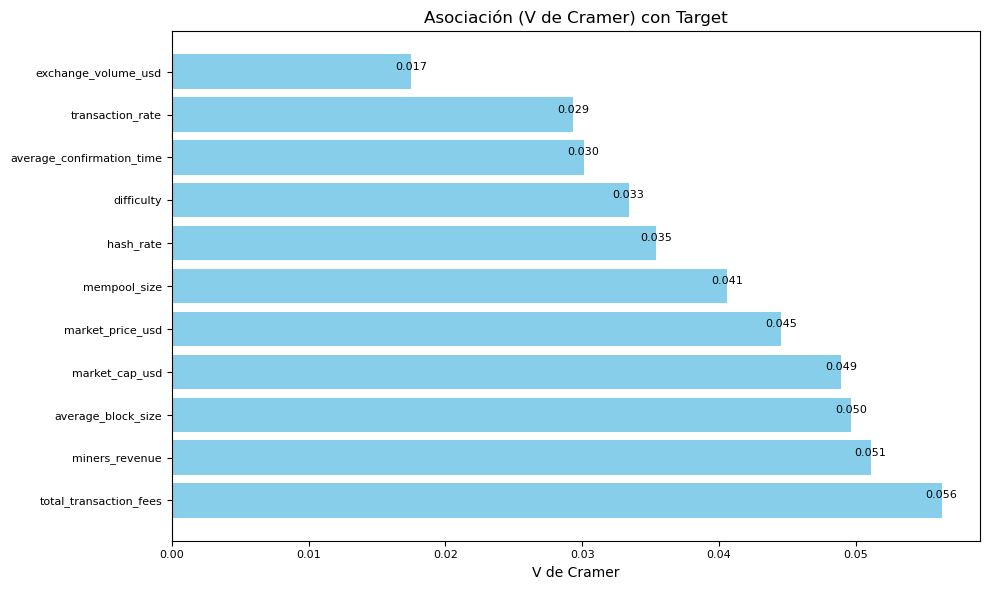

In [29]:
target = df_blockchain['Target'] # Variable objetivo
inputs = df_blockchain.drop(['Target'], axis = 1) # Variables descriptivas

# --- V de Cramer
graficoVcramer(inputs, target)

##### 🔎 Interpretación:

Las diez variables que muestran una mayor relación con la variable objetivo, según su V de Crammer son las siguientes:
1. `OBV_diff`: 0.1
2. `ADL_diff`: 0.089
3. `dRSI_14`: 0.084
4. `dRSI_7`: 0.082
5. `RSI_7`: 0.079
6. `WR_14`: 0.075
7. `STOCH_K_14`: 0.075
8. `WR_7`: 0.065
9. `STOCH_K_7`: 0.065
10. `BB_percent_20`: 0.064

### 📈 Relaciones entre variables explicativas cuantitativas
El coeficiente de correlación de Pearson mide la fuerza y dirección de la relación lineal entre dos variables numéricas. Su valor oscila entre -1 y 1, donde un coeficiente cercano a 1 indica una fuerte relación positiva, mientras que un valor próximo a -1 señala una fuerte relación negativa. Aunque en el caso de las **redes neuronales** la presencia de multicolinealidad no resulta tan crítica como en otros algoritmos (p. ej., regresión lineal o logística), el análisis y posible reducción de variables altamente correlacionadas puede aportar ventajas relevantes:  

- **Eficiencia computacional**  
   - Un conjunto con **98 variables altamente correlacionadas** puede ralentizar el proceso de entrenamiento.  
   - Un mayor número de parámetros implica **mayor consumo de memoria y tiempo de cómputo**.  
- **Reducción del riesgo de sobreajuste (Overfitting)**  
   - La inclusión de características redundantes incrementa el riesgo de sobreajuste.  
   - Este problema es particularmente relevante en datasets de tamaño reducido.  

> ⚠️ **Nota**: En caso de identificar variables **con una correlación muy alta (>0.9), se seleccionará aquella que tenga el mayor valor de V de Cramer**, ya que es la que aporta más información predictiva sobre la variable objetivo. Las demás serán descartadas.

In [39]:
def dibujar_matriz_corr(df):
    """
    Dibuja un heatmap de la matriz de correlación de un DataFrame.

    Parámetros:
    - df: DataFrame con las variables a analizar.
    - title: Título del gráfico.
    - figsize: Tupla (ancho, alto). Si es None, se ajusta automáticamente según número de variables.
    - annot_size: Tamaño de los números dentro de cada celda.
    """

    # Calcular matriz de correlación
    corr_matrix = df.corr()

    plt.figure(figsize=(10, 18))  # tamaño adecuado para menos variables
    
    sns.heatmap(
        corr_matrix,
        cmap='coolwarm',          # colores azul-rojo
        center=0,                 # centro en 0
        annot=True,               # mostrar los números
        fmt=".2f",                # 2 decimales
        square=True,
        linewidths=.5,
        cbar=False
    )
    
    plt.xticks(rotation=90, fontsize=10)  # rotar etiquetas eje X
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()

#### ➡️ Variables mercado

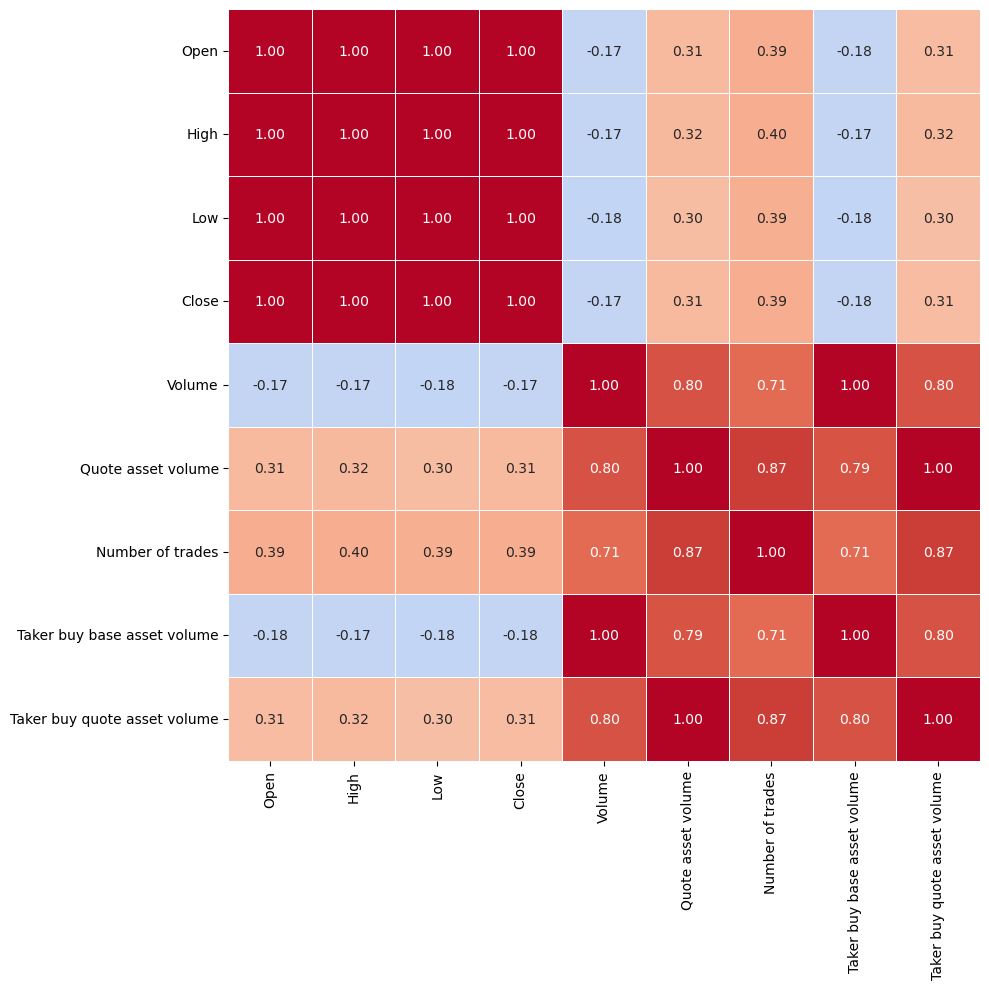

In [40]:
# -- Matriz de correlación
dibujar_matriz_corr(df_mercado)

##### 🔎 Interpretación:
Tenemos varias variables de mercado altamente correlacionadas:
- `Open` ↔ `High` ↔ `Low` ↔ `Close` (1) → **Nos quedamos con `Close`**.
- `Volume` ↔ `Taker buy base asset volume` (1) → **Nos quedamos con `Taker buy base asset volume`**.
- `Quote asset volume` ↔ `Taker buy quote asset` (1) → **Nos quedamos con `Taker buy quote asset`**.

> ⚠️ **Variables descartadas:** `Open`, `High`, `Low`, `Volume`, `Quote asset volume`

#### ➡️ Indicadores técnicos tendencia

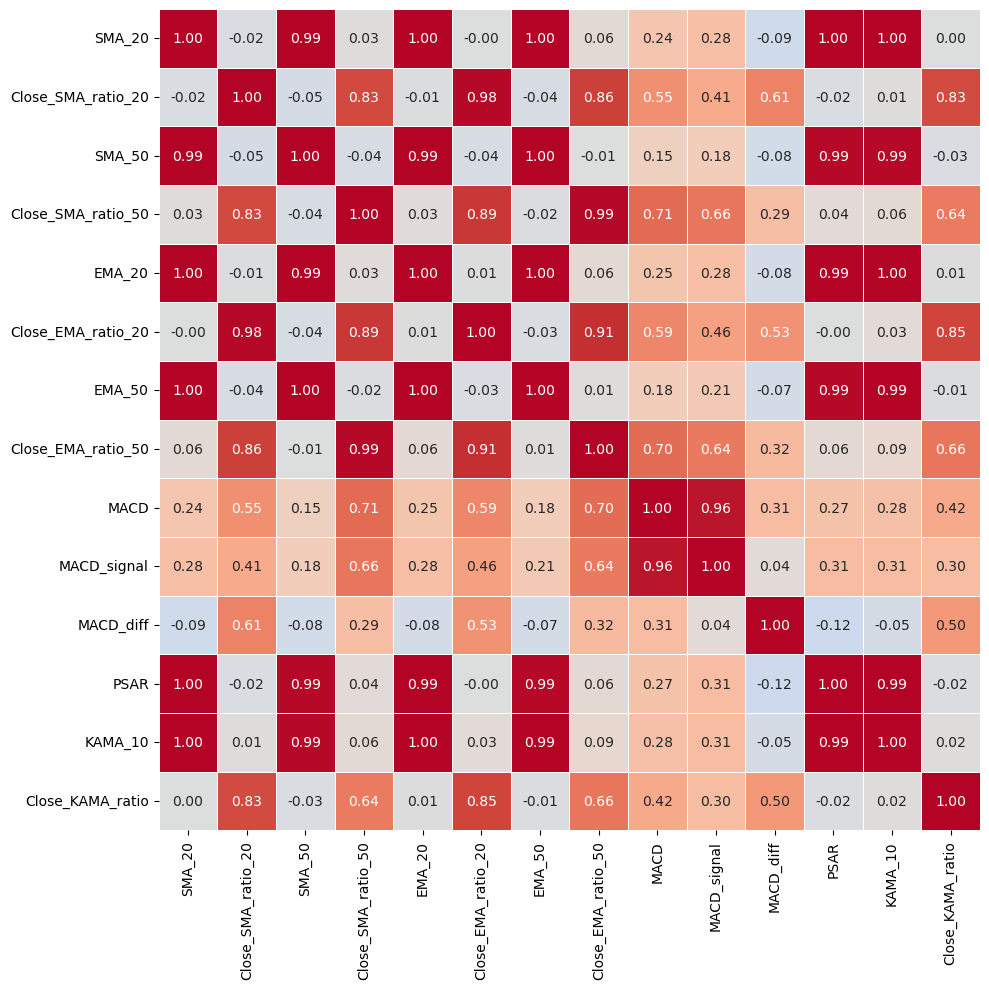

In [43]:
# -- Matriz de correlación
dibujar_matriz_corr(df_ta_tendencia)

##### 🔎 Interpretación:
Tenemos varios indicadores técnicos de tendencia altamente correlacionados:
- **Medias móviles y suavizadores**: Nos quedamos con `EMA_20` como representante de la tendencia y medias móviles.
    - `SMA_20` ↔ `SMA_50` (0.99)
    - `SMA_20` ↔ `EMA_20` (1.00)
    - `SMA_20` ↔ `EMA_50` (1.00)
    - `SMA_20` ↔ `PSAR` (1.00)
    - `SMA_20` ↔ `KAMA_10` (1.00)
    - `SMA_50` ↔ `EMA_20` (0.99)
    - `SMA_50` ↔ `EMA_50` (1.00)
    - `SMA_50` ↔ `PSAR` (0.99)
    - `SMA_50` ↔ `KAMA_10` (0.99)
    - `EMA_20` ↔ `EMA_50` (1.00)
    - `EMA_20` ↔ `PSAR` (0.99)
    - `EMA_20` ↔ `KAMA_10` (1.00)
    - `EMA_50` ↔ `PSAR` (0.99)
    - `EMA_50` ↔ `KAMA_10` (0.99)
    - `PSAR` ↔ `KAMA_10` (0.99)
- **Ratios y MACD**: En este caso, seleccionamos `Close_EMA_ratio_50` y `MACD`
    - `Close_SMA_ratio_50` ↔ `Close_EMA_ratio_50` (0.99)
    - `Close_EMA_ratio_20` ↔ `Close_EMA_ratio_50` (0.91)
    - `MACD` ↔ `MACD_signal` (0.96)

> ⚠️ **Variables descartadas:** `SMA_20`, `SMA_50`, `EMA_50`, `PSAR`, `KAMA_10`, `Close_SMA_ration_50`, `Close_EMA_ratio_20`, `MACD_signal`.

#### ➡️ Indicadores técnicos *momentum*

In [33]:
# -- Matriz de correlación
#dibujar_matriz_corr(df_ta_momentum)

#### ➡️ Indicadores técnicos volatilidad

In [34]:
# -- Matriz de correlación
#dibujar_matriz_corr(df_ta_volatilidad)

#### ➡️ Indicadores técnicos volumen

In [35]:
# -- Matriz de correlación
#dibujar_matriz_corr(df_ta_volumen)

#### ➡️ Variables *blockchain*

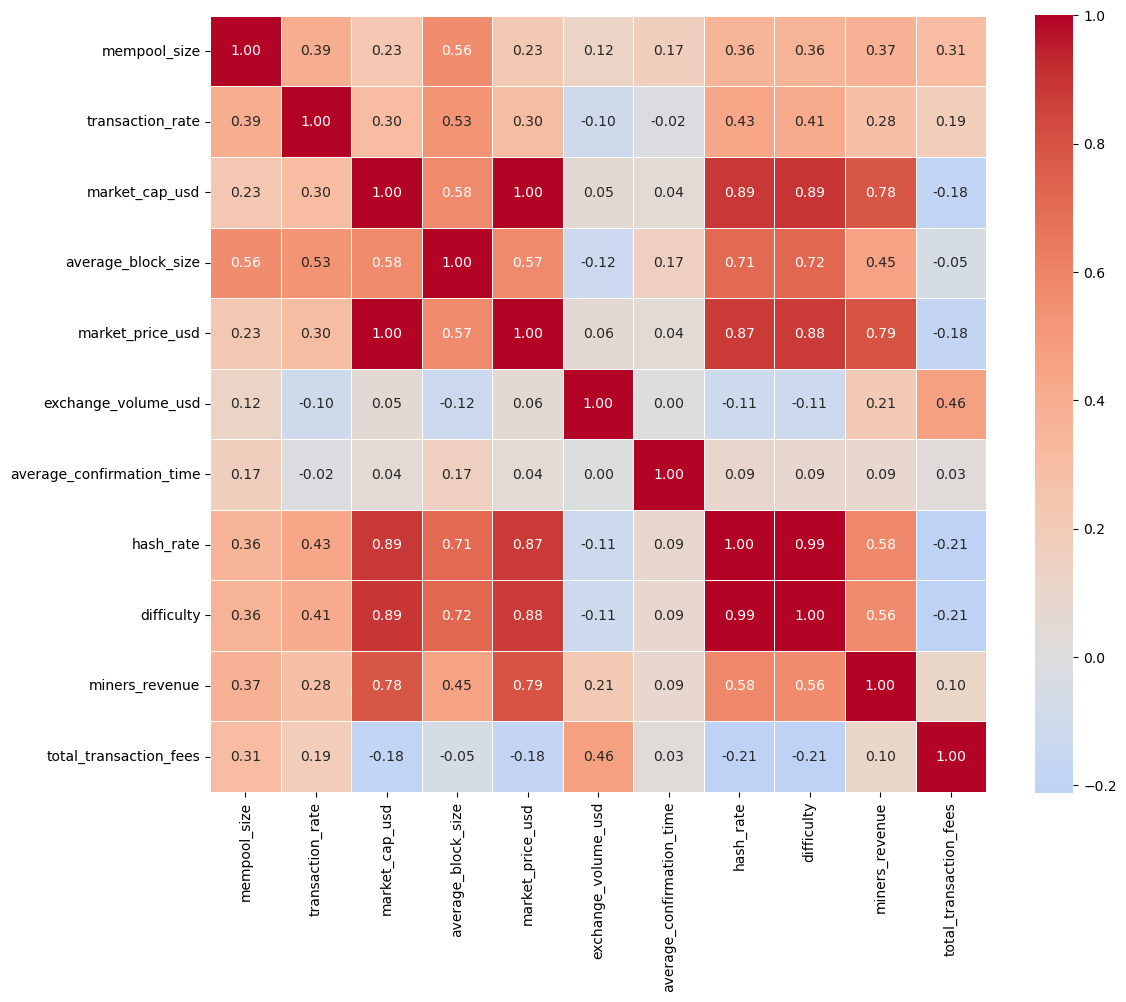

In [36]:
# -- Matriz de correlación
dibujar_matriz_corr(df_blockchain)